# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import urllib
import datetime
import time



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [9]:
# Create a time stamp and getting the current date
#timestamp = pd.Timestamp(datetime.datetime(2023, 4, 22))
#res = timestamp.today()



# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url =  f"{url}appid={weather_api_key}&units={units}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #urllib_url = urllib.request.pathname2url(city)
    #city_url = query_url + "&q=" + urllib_url
    
    city_url = query_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | papao
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | changli
Processing Record 14 of Set 1 | lumding railway colony
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | akureyri
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | toyooka
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | grytviken
Processing Record 22 o

Processing Record 37 of Set 4 | hadibu
Processing Record 38 of Set 4 | tidjikja
Processing Record 39 of Set 4 | sinabang
Processing Record 40 of Set 4 | qaqortoq
Processing Record 41 of Set 4 | zuyevka
Processing Record 42 of Set 4 | ataq
Processing Record 43 of Set 4 | markaz-e hukumat-e darweshan
Processing Record 44 of Set 4 | selfoss
Processing Record 45 of Set 4 | amga
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | carutapera
Processing Record 48 of Set 4 | dubbo
Processing Record 49 of Set 4 | kerikeri
Processing Record 0 of Set 5 | ironwood
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | fort bragg
Processing Record 3 of Set 5 | santa cruz
Processing Record 4 of Set 5 | sudova vyshnya
Processing Record 5 of Set 5 | las heras
Processing Record 6 of Set 5 | bikaner
Processing Record 7 of Set 5 | kokopo
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | mejit
Processing Record 10 of Set 5 | port saint john's
P

Processing Record 29 of Set 8 | hilo
Processing Record 30 of Set 8 | ancud
Processing Record 31 of Set 8 | kanungu
Processing Record 32 of Set 8 | christchurch
Processing Record 33 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 34 of Set 8 | jiwani
Processing Record 35 of Set 8 | cabo san lucas
Processing Record 36 of Set 8 | melfort
Processing Record 37 of Set 8 | igarka
Processing Record 38 of Set 8 | whangarei
Processing Record 39 of Set 8 | fisterra
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | espargos
City not found. Skipping...
Processing Record 42 of Set 8 | fukuecho
Processing Record 43 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 44 of Set 8 | istgah-e rah ahan-e garmsar
Processing Record 45 of Set 8 | uzgen
Processing Record 46 of Set 8 | sucua
Processing Record 47 of Set 8 | bhawanipatna
Processing Record 48 of Set 8 | manggar
Processing Record 49 of Set 8 | eenhana
Processing Record 0 of Set 9 | terbanggi

Processing Record 15 of Set 12 | berdigestyakh
Processing Record 16 of Set 12 | sumbawa besar
Processing Record 17 of Set 12 | hede
Processing Record 18 of Set 12 | xilin hot
Processing Record 19 of Set 12 | yalihuyuk
Processing Record 20 of Set 12 | bokoro
Processing Record 21 of Set 12 | dwarka
Processing Record 22 of Set 12 | cadale
Processing Record 23 of Set 12 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,2.57,US,1683195775
1,ushuaia,-54.8000,-68.3000,2.81,93,100,2.57,AR,1683195775
2,adamstown,-25.0660,-130.1015,24.10,72,98,5.40,PN,1683195775
3,sitka,57.0531,-135.3300,3.94,87,20,2.06,US,1683195775
4,saldanha,-33.0117,17.9442,21.03,69,76,6.67,ZA,1683195775


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,2.57,US,1683195775
1,ushuaia,-54.8000,-68.3000,2.81,93,100,2.57,AR,1683195775
2,adamstown,-25.0660,-130.1015,24.10,72,98,5.40,PN,1683195775
3,sitka,57.0531,-135.3300,3.94,87,20,2.06,US,1683195775
4,saldanha,-33.0117,17.9442,21.03,69,76,6.67,ZA,1683195775


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

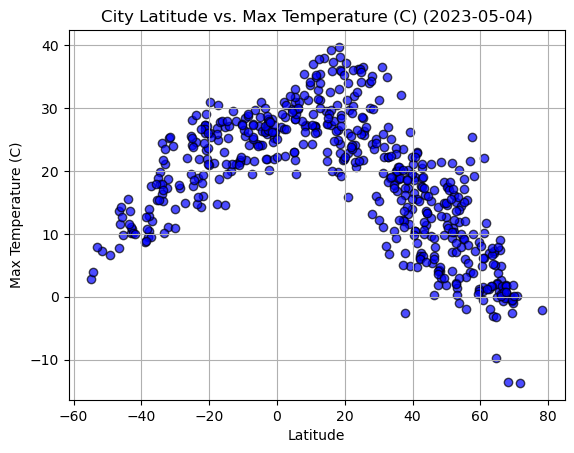

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (C) ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

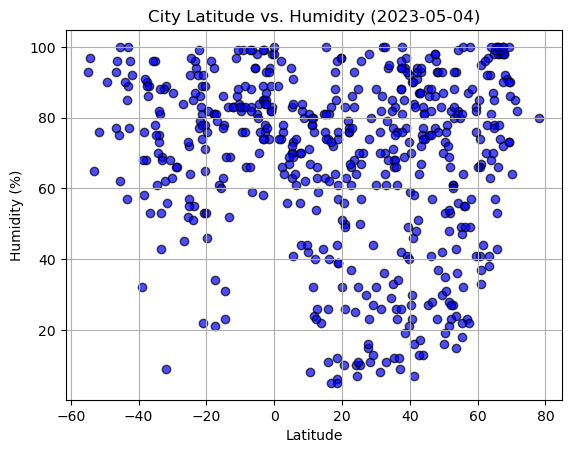

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

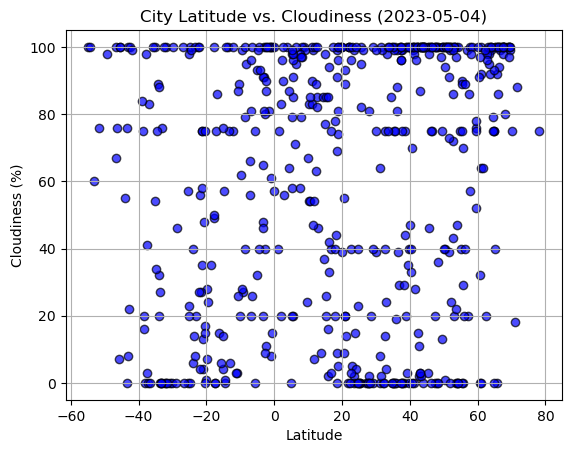

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

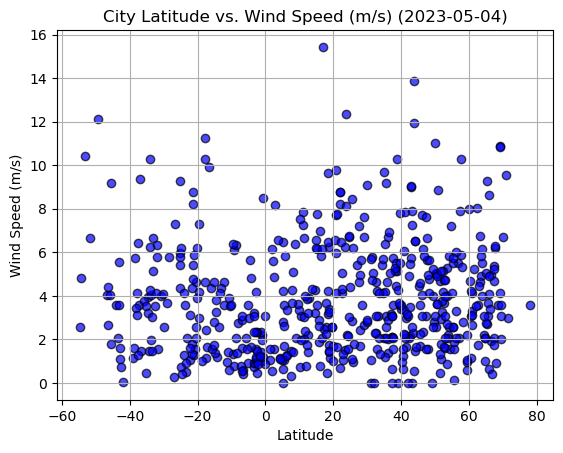

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors = "blue", edgecolors = "black", alpha = 0.70)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (m/s) ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,2.57,US,1683195775
3,sitka,57.0531,-135.3300,3.94,87,20,2.06,US,1683195775
5,bethel,41.3712,-73.4140,8.53,84,100,2.96,US,1683195776
6,saipan,15.1355,145.7010,27.39,100,20,6.17,MP,1683195776
9,ilulissat,69.2167,-51.1000,0.01,100,100,4.12,GL,1683195778


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,2.81,93,100,2.57,AR,1683195775
2,adamstown,-25.0660,-130.1015,24.10,72,98,5.40,PN,1683195775
4,saldanha,-33.0117,17.9442,21.03,69,76,6.67,ZA,1683195775
7,rio grande,-32.0350,-52.0986,18.72,89,100,6.34,BR,1683195777
8,papao,-17.7500,-149.5500,26.82,81,49,11.27,PF,1683195777


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8419073928821392


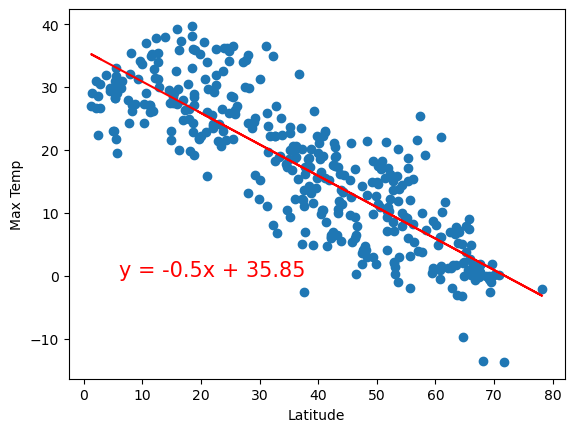

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7917101259362235


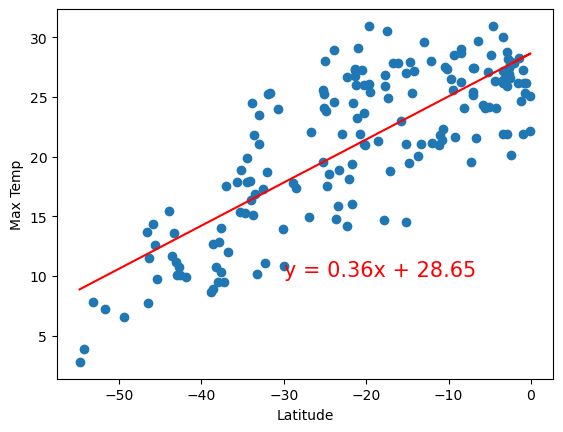

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:The Northern and Southern Hemisphere plots show that there is a strong correlation between the Latitude and Maximum Temperature. There is a negative correlation (r-value = -0.84) between latitude and maximum temperature at the northern hemisphere. There is a positive correletion (r-value = 0.79) between latitude and maximum temperature at the southern hemisphere.




### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15312794764965107


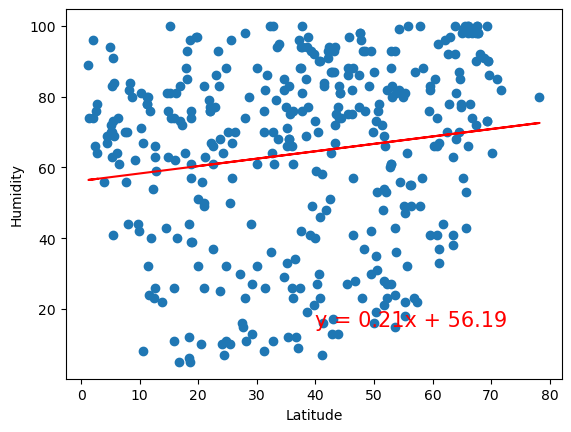

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.11321436710556361


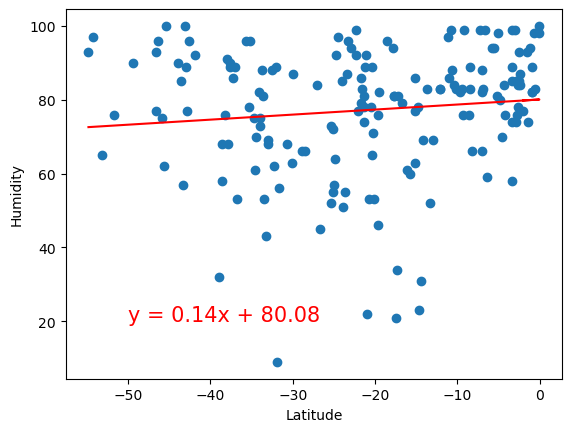

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** At the nothern hemisphere, the relationship between latitude and humidity retured an r-value of 0.15. At the southern hemisphere, the same relationship returned an r-value of 0.11. These two r-values are very close to 0 and show very little correlation. A correlation of 1 would have been perfect.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13781133388801906


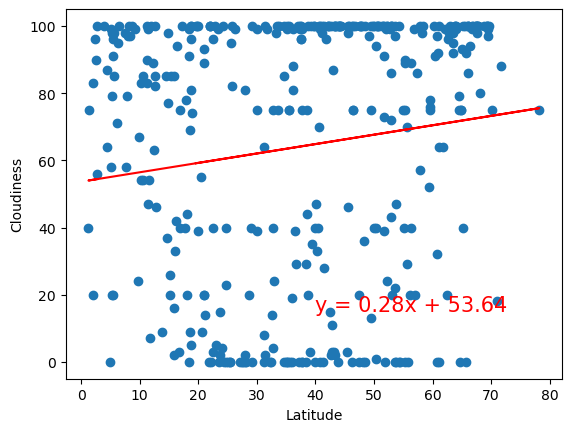

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.07253412562916656


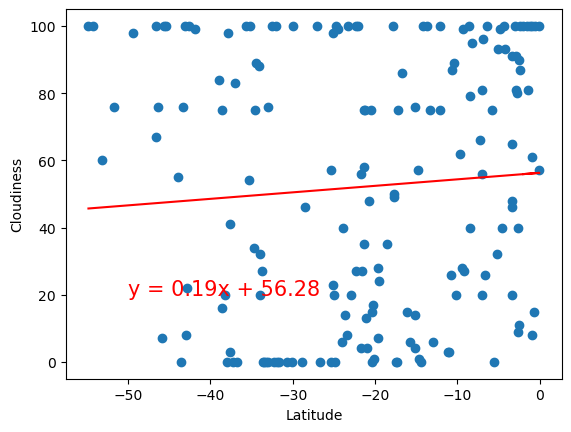

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** The relationship between latitude and cloudiness at the northern and southern hemispheres returned r=values of 0.13 and 0.17 respectively, showing that there is very little correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.053224670445446265


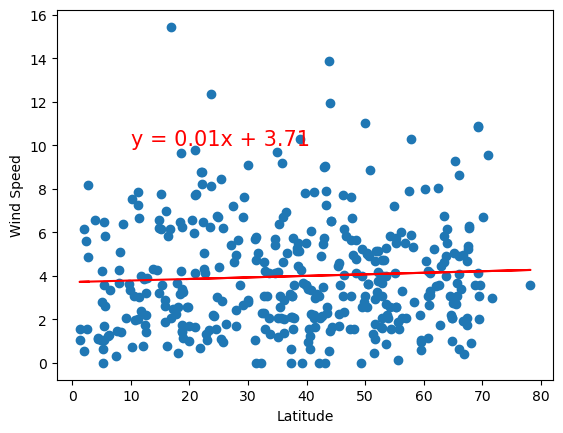

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.2920602354558709


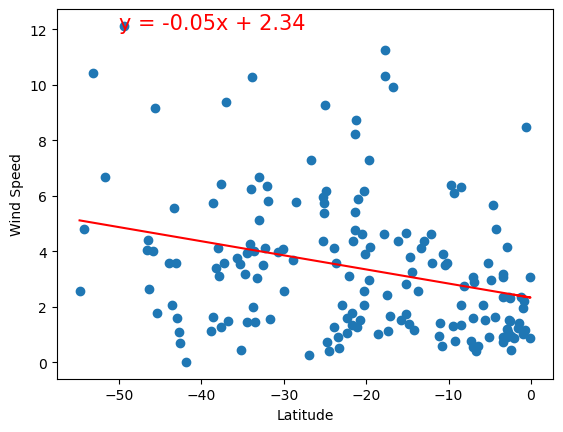

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** At the northern hemisphere, the relationship between latitude and wind speed returned an r-value of 0.05 showing a weak positive correlation. At the southern hemisphere, the relationship returned an r-value of -0.29 showing a weak negative correlation.